## Import Libraries

In [50]:
import pandas as pd
import numpy as np
import sweetviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle

## Import dataset

In [2]:
df = pd.read_csv(r"C:\Users\91830\Downloads\Data Science  Course\Machine Learning\Weekend Project\fedex.csv")

### Exploratory data analysis

In [3]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [4]:
df.shape

(3604175, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [6]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

In [7]:
col_int = ['Month', 'DayofMonth', 'DayOfWeek','Planned_Shipment_Time', 'Planned_Delivery_Time','Carrier_Num','Distance']
col_float = ['Actual_Shipment_Time','Planned_TimeofTravel', 'Shipment_Delay', 'Delivery_Status']

In [8]:
for i in col_int:
    print(df[i].unique())

[1 2 3 4 5 6]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  2  1]
[4 5 6 7 1 2 3]
[1955  735  620 ...   34  245  425]
[2225 1000  750 ...  206  319  419]
[ 335 3231  448 ... 6809 6846 5913]
[ 810  515  688 ... 1866  855 1413]


In [9]:
for i in col_int:
    df[i] = df[i].astype(np.int32)

In [10]:
for i in col_int:
    print(df[i].dtype)

int32
int32
int32
int32
int32
int32
int32


In [12]:
for i in col_float:
    df[i] = df[i].astype(np.float32)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int32  
 2   DayofMonth             int32  
 3   DayOfWeek              int32  
 4   Actual_Shipment_Time   float32
 5   Planned_Shipment_Time  int32  
 6   Planned_Delivery_Time  int32  
 7   Carrier_Name           object 
 8   Carrier_Num            int32  
 9   Planned_TimeofTravel   float32
 10  Shipment_Delay         float32
 11  Source                 object 
 12  Destination            object 
 13  Distance               int32  
 14  Delivery_Status        float32
dtypes: float32(4), int32(7), int64(1), object(3)
memory usage: 261.2+ MB


In [14]:
df.isna().sum()

Year                         0
Month                        0
DayofMonth                   0
DayOfWeek                    0
Actual_Shipment_Time     81602
Planned_Shipment_Time        0
Planned_Delivery_Time        0
Carrier_Name                 0
Carrier_Num                  0
Planned_TimeofTravel       547
Shipment_Delay           81602
Source                       0
Destination                  0
Distance                     0
Delivery_Status          81602
dtype: int64

In [15]:
df.drop('Year',axis=1,inplace=True)

In [16]:
imp = SimpleImputer(strategy='most_frequent')

In [17]:
df['Delivery_Status'] = imp.fit_transform(df[['Delivery_Status']])

### Declare feature variables and target variable

In [23]:
X = df.drop('Delivery_Status',axis=1)
y = df['Delivery_Status']

### Split data into separate training and test set

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

### Pipeline creation for feature preprocessing (Encoding for categorical variables and Standardization/Normalization  for continuous variables)

In [18]:
continuous = [
    'Actual_Shipment_Time', 'Planned_Shipment_Time', 'Planned_Delivery_Time', 
    'Planned_TimeofTravel', 'Shipment_Delay', 'Distance'
]
nominal = [
    'Carrier_Name', 'Carrier_Num', 'Source', 'Destination'
]
ordinal = ['Month', 'DayofMonth', 'DayOfWeek']

In [19]:
order = [[1,2,3,4,5,6],
        [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
        [1,2,3,4,5,6,7]]

In [20]:
cont_transform = Pipeline([("Mean Imputation", SimpleImputer(strategy='mean')),
         ('Standard Scalar', StandardScaler())])
nomi_transform = Pipeline([("Mode Imputation", SimpleImputer(strategy='most_frequent')),
         ('ohe', OneHotEncoder(handle_unknown='ignore',drop='first'))])
ordi_transform = Pipeline([("Mode Imputation", SimpleImputer(strategy='most_frequent')),
         ('ohe', OrdinalEncoder(categories=order))])

In [21]:
preprocess = ColumnTransformer([('Continuos Transform', cont_transform, continuous),
                  ('Nominal Transform',nomi_transform,nominal),
                  ('Ordinal Transform',ordi_transform,ordinal)])
preprocess

ColumnTransformer(transformers=[('Continuos Transform',
                                 Pipeline(steps=[('Mean Imputation',
                                                  SimpleImputer()),
                                                 ('Standard Scalar',
                                                  StandardScaler())]),
                                 ['Actual_Shipment_Time',
                                  'Planned_Shipment_Time',
                                  'Planned_Delivery_Time',
                                  'Planned_TimeofTravel', 'Shipment_Delay',
                                  'Distance']),
                                ('Nominal Transform',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most...
                                                                handle_unknown='ignore'))]),
                                 ['Carrier_Name', 'Carrier_Num', 'Source',
                                  'Destination']),
                                ('Ordinal Transform',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OrdinalEncoder(categories=[[1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6],
                                                                             [1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9,
                                                                              10,
                                                                              11,
                                                                              12,
                                                                              13,
                                                                              14,
                                                                              15,
                                                                              16,
                                                                              17,
                                                                              18,
                                                                              19,
                                                                              20,
                                                                              21,
                                                                              22,
                                                                              23,
                                                                              24,
                                                                              25,
                                                                              26,
                                                             

## Model Building & Model Evalution

### LogisticRegression

In [22]:
model_lr = Pipeline([('Data Preprocessing',preprocess),
         ('Algorithm',LogisticRegression())])
model_lr

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuos Transform',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Standard '
                                                                   'Scalar',
                                                                   StandardScaler())]),
                                                  ['Actual_Shipment_Time',
                                                   'Planned_Shipment_Time',
                                                   'Planned_Delivery_Time',
                                                   'Planned_TimeofTravel',
                                                   'Shipment_Delay',
                                                   'Distance']),
                                                 ('Nominal Transform',
                                                  Pipeline(steps=[('Mod...
                                                   'Carrier_Num', 'Source',
                                                   'Destination']),
                                                 ('Ordinal Transform',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8,
                                                                                               9,
                                                                                               10,
                                                                                               11,
                                                                                               12,
                                                                                               13,
                                                                                               14,
                                                                                               15,
                                                                                               16,
                                                                                               17,
    

C:\Users\91830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy Score: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    577611
         1.0       1.00      1.00      1.00    143224

    accuracy                           1.00    720835
   macro avg       1.00      1.00      1.00    720835
weighted avg       1.00      1.00      1.00    720835



<Axes: >

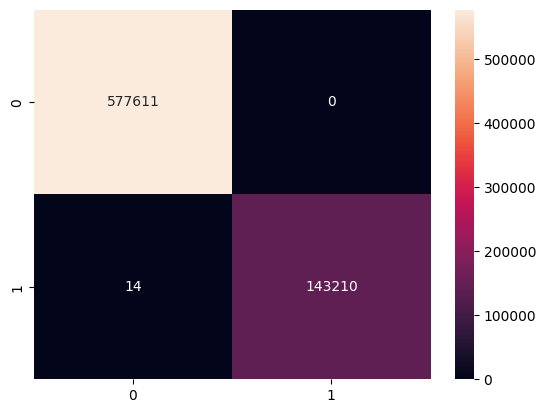

In [48]:
model_lr.fit(X_train,y_train)
lr_pred = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred)
conf_matrix_lr = confusion_matrix(y_test, lr_pred)
print(f'Accuracy Score: {accuracy}')
print(classification_report(y_test, lr_pred))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d")

# DecisionTreeClassifier

In [26]:
model_dt = Pipeline([('Data Preprocessing',preprocess),
         ('Algorithm',DecisionTreeClassifier())])
model_dt

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuos Transform',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Standard '
                                                                   'Scalar',
                                                                   StandardScaler())]),
                                                  ['Actual_Shipment_Time',
                                                   'Planned_Shipment_Time',
                                                   'Planned_Delivery_Time',
                                                   'Planned_TimeofTravel',
                                                   'Shipment_Delay',
                                                   'Distance']),
                                                 ('Nominal Transform',
                                                  Pipeline(steps=[('Mod...
                                                   'Carrier_Num', 'Source',
                                                   'Destination']),
                                                 ('Ordinal Transform',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8,
                                                                                               9,
                                                                                               10,
                                                                                               11,
                                                                                               12,
                                                                                               13,
                                                                                               14,
                                                                                               15,
                                                                                               16,
                                                                                               17,
    

C:\Users\91830\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy Score: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    577611
         1.0       1.00      1.00      1.00    143224

    accuracy                           1.00    720835
   macro avg       1.00      1.00      1.00    720835
weighted avg       1.00      1.00      1.00    720835



<Axes: >

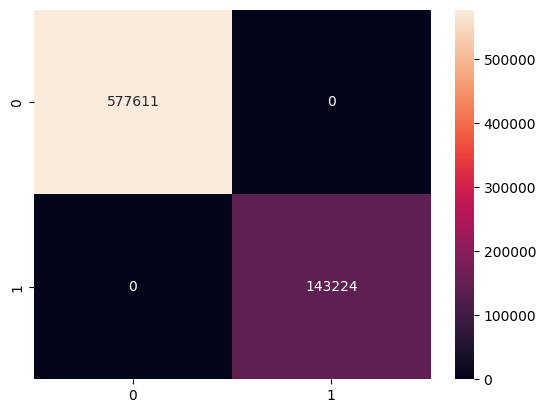

In [47]:
model_dt.fit(X_train,y_train)
dt_pred = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test,dt_pred)
conf_matrix_dt = confusion_matrix(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')
print(classification_report(y_test, dt_pred))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d")

Month = int(input("Enter the month (1-6): "))
DayofMonth = int(input("Enter the day of the month (1-31): "))
DayOfWeek = int(input("Enter the day of the week (1 for Monday, 7 for Sunday): "))
Actual_Shipment_Time = float(input("Enter the actual shipment time : "))
Planned_Shipment_Time = int(input("Enter the planned shipment time : "))
Planned_Delivery_Time = int(input("Enter the planned delivery time : "))
Carrier_Name = input("Enter the carrier name: ")
Carrier_Num = int(input("Enter the carrier number: "))
Planned_TimeofTravel = float(input("Enter the planned time of travel in hours: "))
Shipment_Delay = float(input("Enter the shipment delay in hours: "))
Source = input("Enter the source location: ")
Destination = input("Enter the destination location: ")
Distance = int(input("Enter the distance in kilometers: "))

input_data = pd.DataFrame([{
    'Month': Month,
    'DayofMonth': DayofMonth,
    'DayOfWeek': DayOfWeek,
    'Actual_Shipment_Time': Actual_Shipment_Time,
    'Planned_Shipment_Time': Planned_Shipment_Time,
    'Planned_Delivery_Time': Planned_Delivery_Time,
    'Carrier_Name': Carrier_Name,
    'Carrier_Num': Carrier_Num,
    'Planned_TimeofTravel': Planned_TimeofTravel,
    'Shipment_Delay': Shipment_Delay,
    'Source': Source,
    'Destination': Destination,
    'Distance': Distance
}])
Delivery_Status = model_lr.predict(input_data)[0]

print(f"The predicted delivery status is: {Delivery_Status}")

## Model Deployment

In [29]:
pickle.dump(model_dt,open("Fedex.pkl",'wb'))

In [31]:
model = pickle.load(open("Fedex.pkl","rb"))

In [32]:
model

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuos Transform',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Standard '
                                                                   'Scalar',
                                                                   StandardScaler())]),
                                                  ['Actual_Shipment_Time',
                                                   'Planned_Shipment_Time',
                                                   'Planned_Delivery_Time',
                                                   'Planned_TimeofTravel',
                                                   'Shipment_Delay',
                                                   'Distance']),
                                                 ('Nominal Transform',
                                                  Pipeline(steps=[('Mod...
                                                   'Carrier_Num', 'Source',
                                                   'Destination']),
                                                 ('Ordinal Transform',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6],
                                                                                              [1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6,
                                                                                               7,
                                                                                               8,
                                                                                               9,
                                                                                               10,
                                                                                               11,
                                                                                               12,
                                                                                               13,
                                                                                               14,
                                                                                               15,
                                                                                               16,
                                                                                               17,
    

### App Link 
https://fedex-delivery-status-prediction.streamlit.app/